In [2]:
import pandas as pd
import datetime
import os
import numpy
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

count = 8
/home/jovyan/work/Output/Processing/Jan.txt


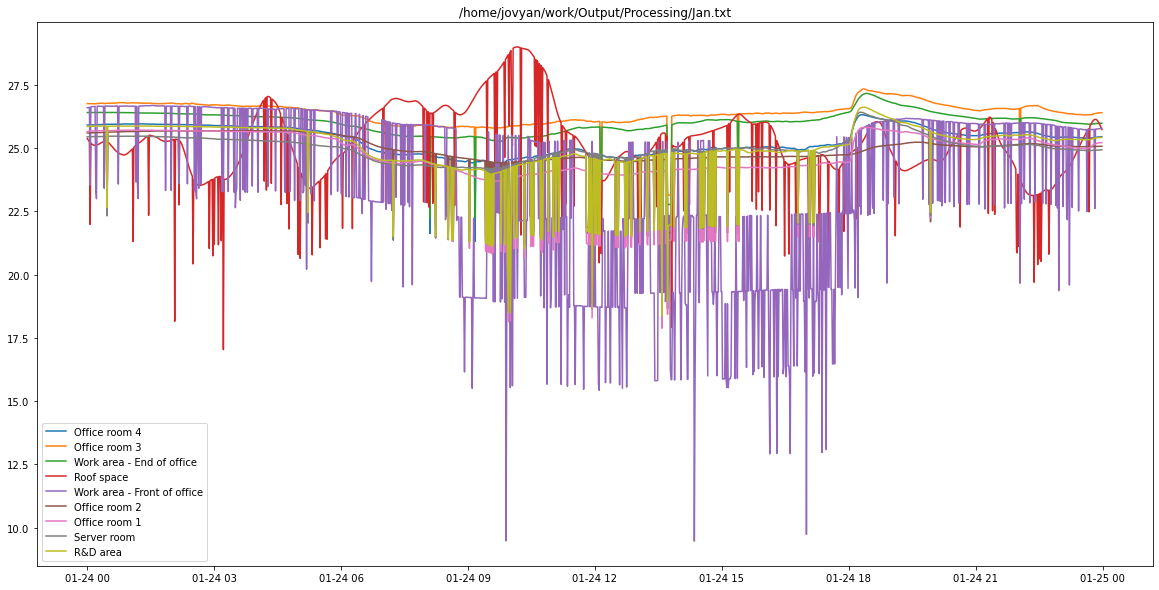

count = 24
/home/jovyan/work/Output/Processing/Feb.txt


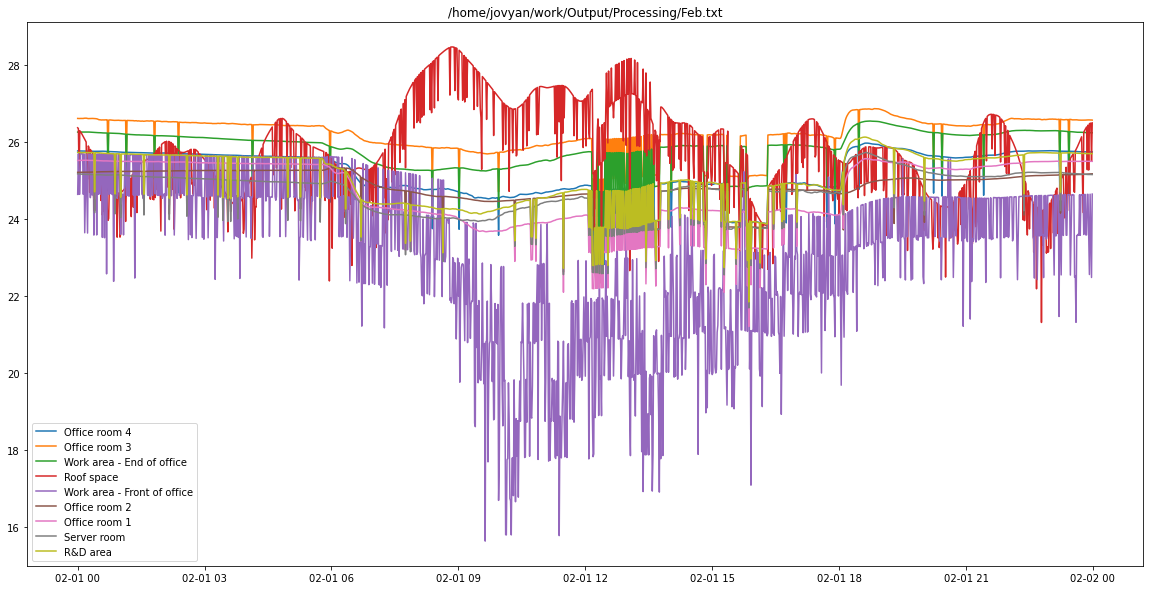

count = 24
/home/jovyan/work/Output/Processing/Mar.txt


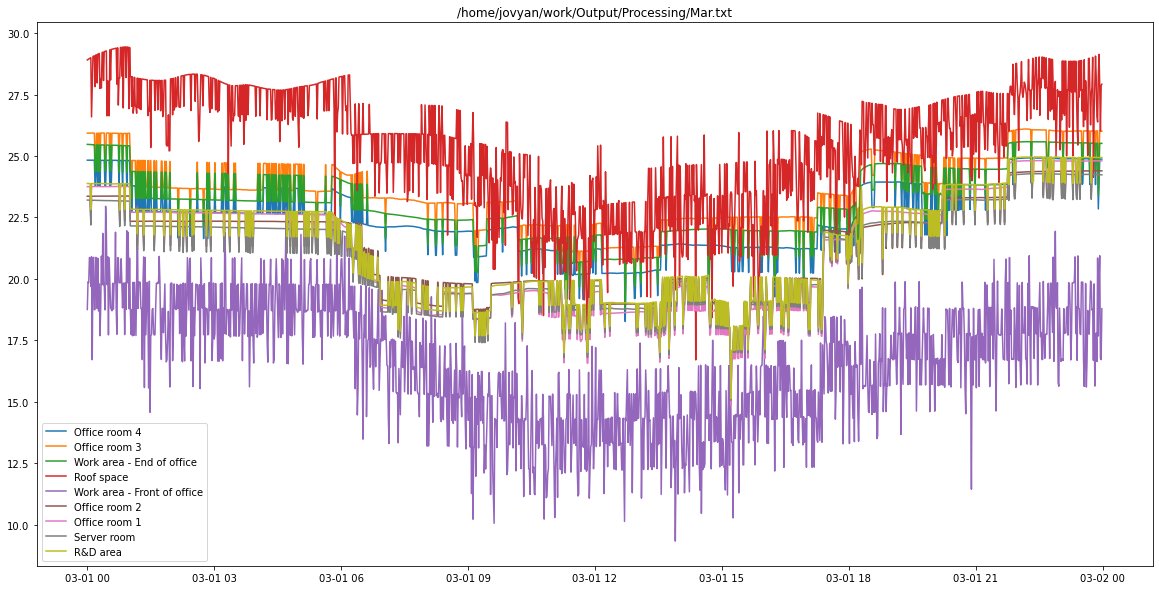

count = 26
/home/jovyan/work/Output/Processing/Apr.txt


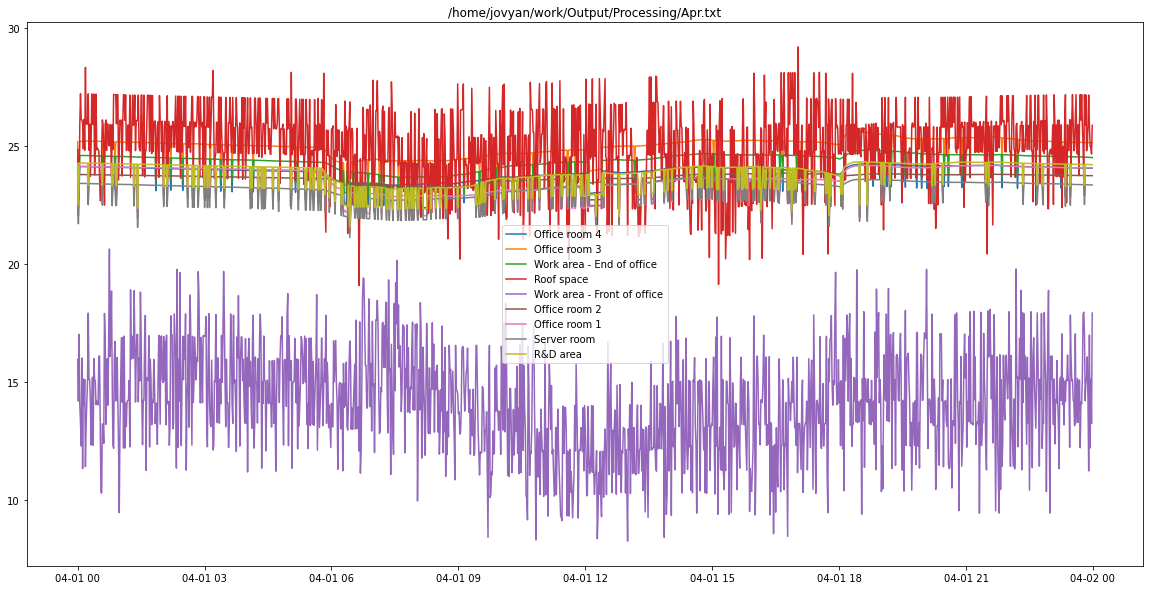

count = 23
/home/jovyan/work/Output/Processing/May.txt


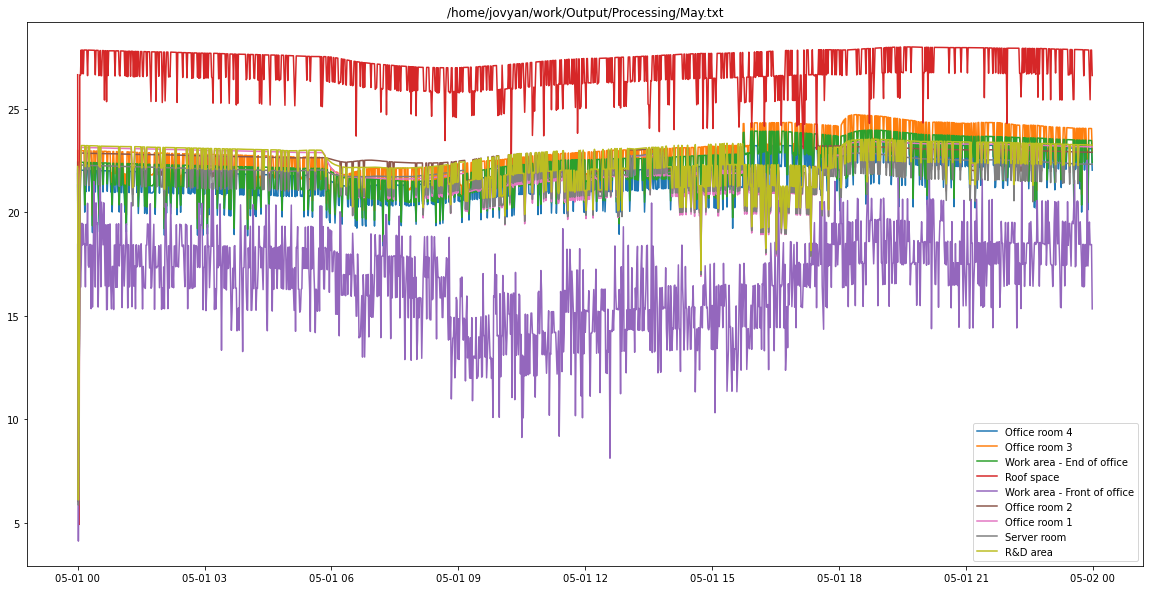

count = 23
/home/jovyan/work/Output/Processing/Jun.txt


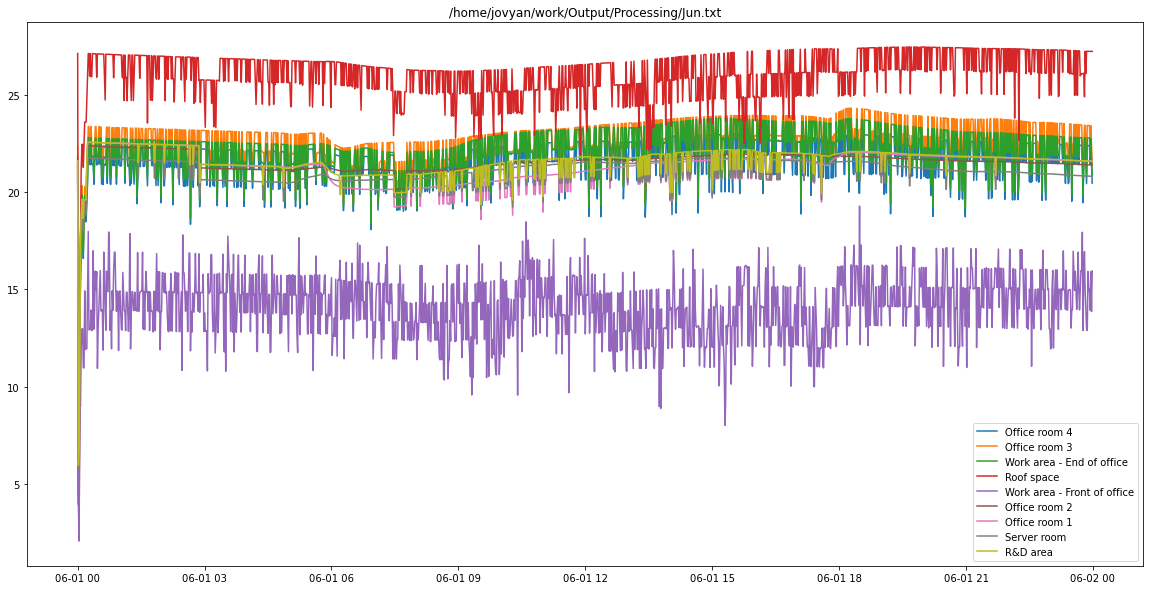

count = 25
/home/jovyan/work/Output/Processing/Jul.txt


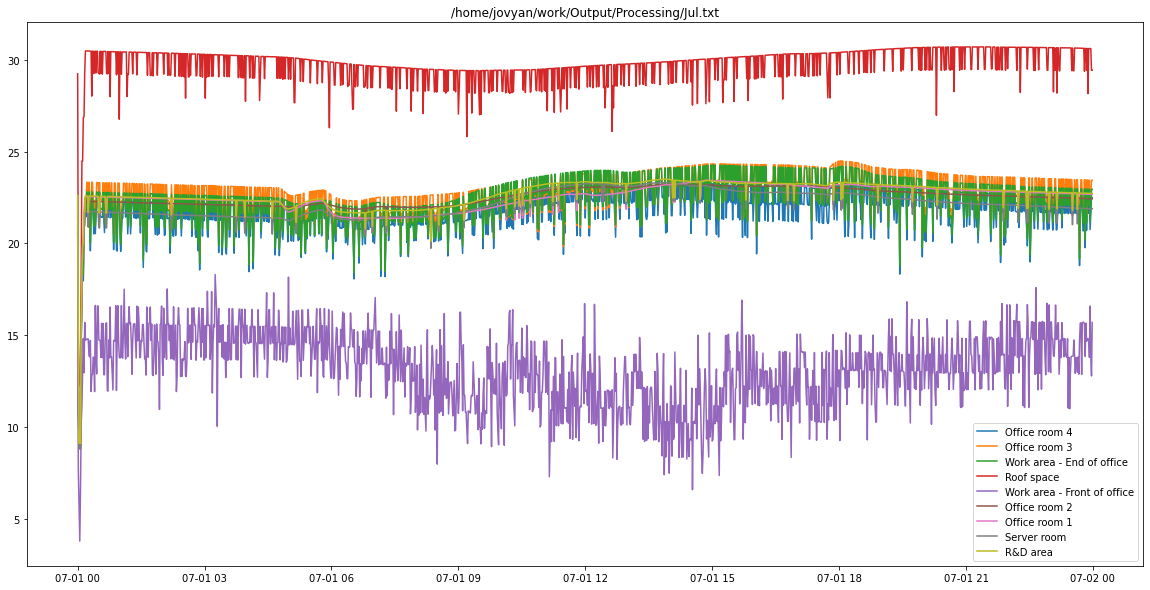

count = 11
/home/jovyan/work/Output/Processing/Aug.txt


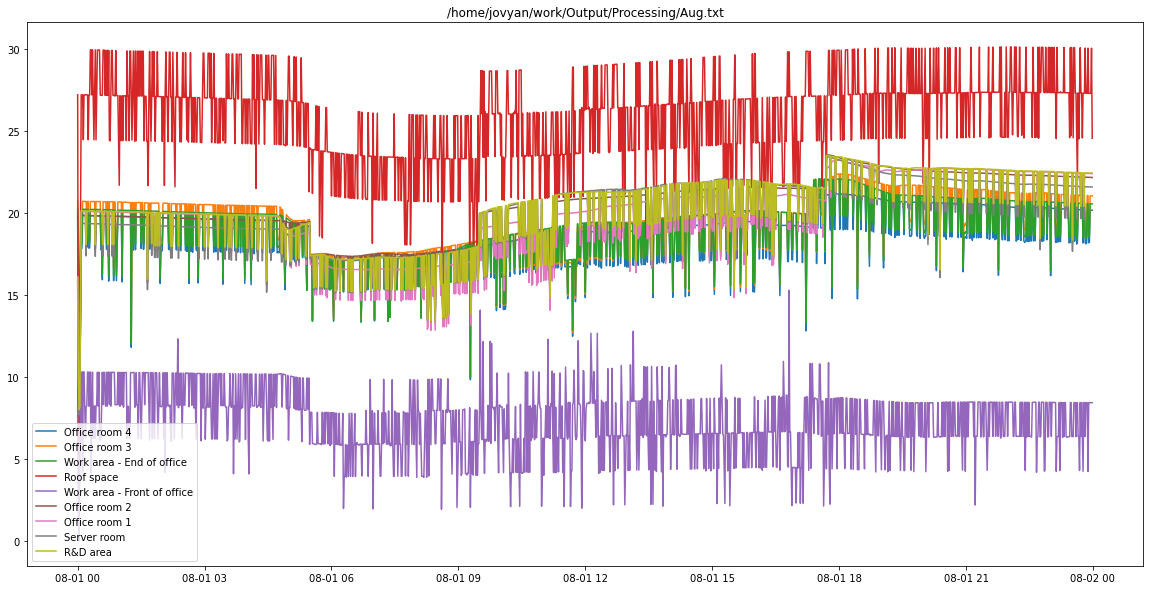

count = 1
count = 1
count = 1
count = 1
count = 108
/home/jovyan/work/Output/Processing/Winter.txt


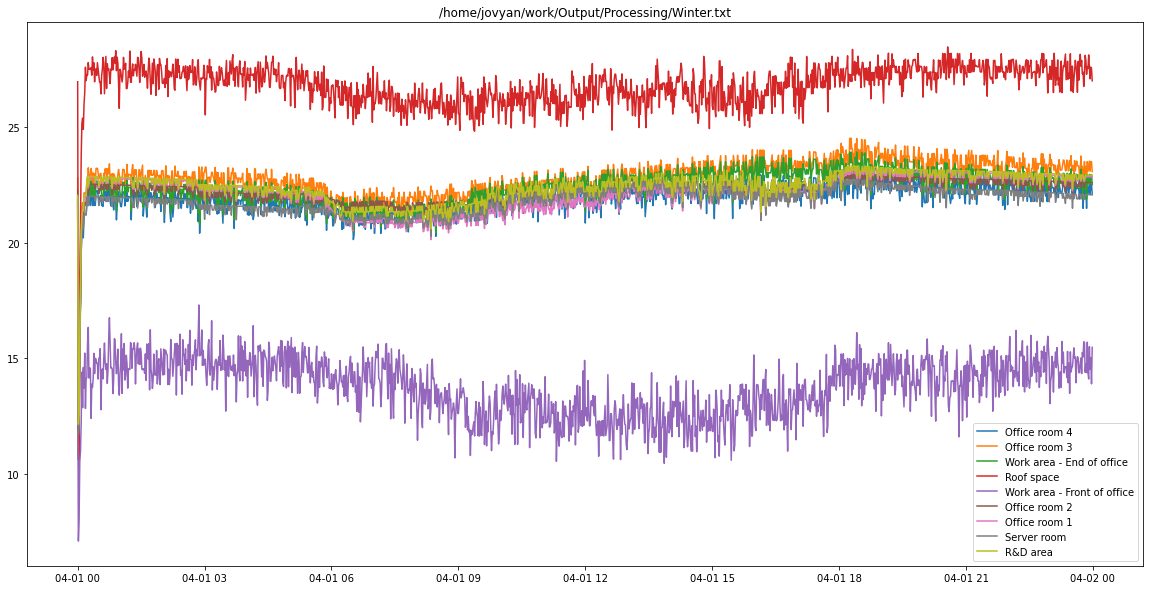

count = 56
/home/jovyan/work/Output/Processing/Summer.txt


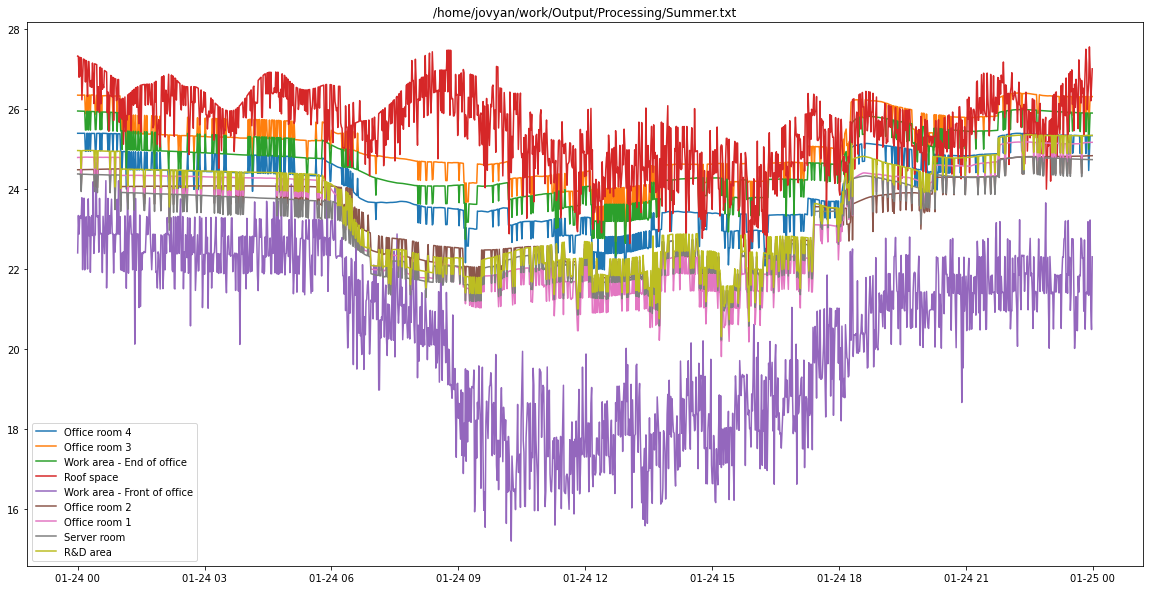

count = 164
/home/jovyan/work/Output/Processing/Allyear.txt


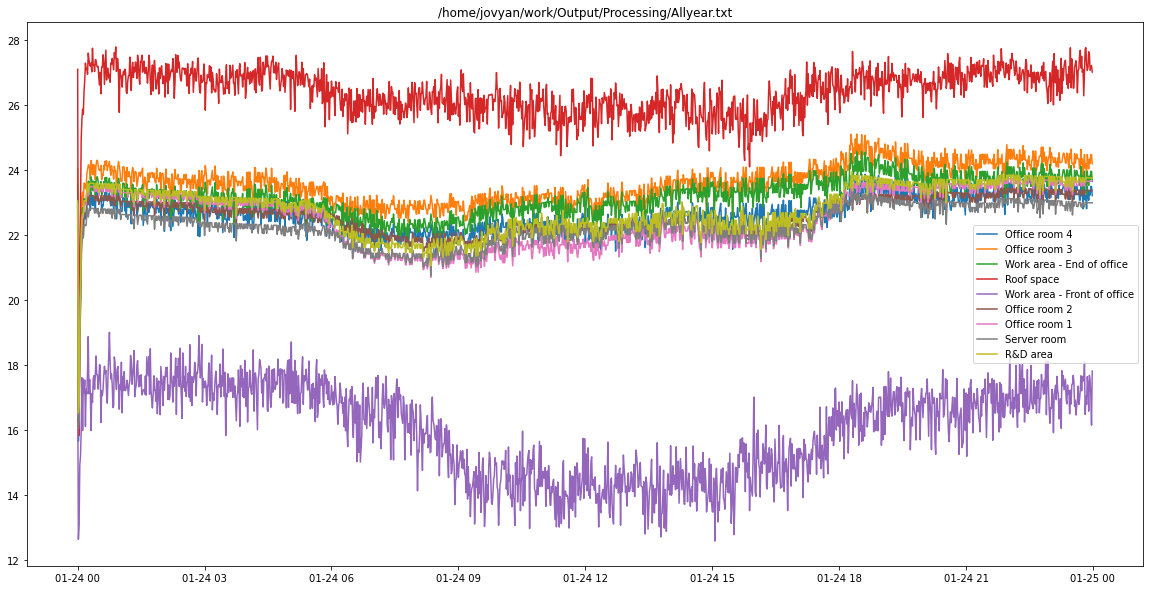

count = 1


In [7]:


def list_files(dir, regExp):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            if( re.search(regExp,name) != None):
            # if(name.find(".txt") >= 0 and root.find("\\stats\\") == -1):
            #     r.append(os.path.join(root, name))
            #if(name.find(".txt") >= 0 and name.find('.') == 8 ):
                r.append(os.path.join(root, name))
    return r

def CreateOutputProfile(files, outputName):
    dfSum = None
    count = 1
    for f in files:
        df = pd.read_csv(f, sep = ",", header=0,parse_dates=[0], index_col=0 )
        df.fillna(0.0, inplace=True)
        if( df.shape[0] == 1440 and df.shape[1] == 9 ):
            if( dfSum is None ):
                dfSum = df
            else:
                dfSum = dfSum.add( df.values )
                count +=1
    #dfSum['time'] = pd.to_datetime(dfSum['time']).dt.date
    print(f'count = {count}')
    if( count > 1 ):
        dfSum = dfSum.div(count)
        dfSum.to_csv(outputName )
        print(outputName)
        plt.rcParams["figure.figsize"] = (20,10)
        fig, ax = plt.subplots()
        ax.plot(dfSum)
        ax.set(title=outputName)
        ax.legend(['Office room 4', 'Office room 3','Work area - End of office','Roof space','Work area - Front of office','Office room 2','Office room 1', 'Server room', 'R&D area'])
        plt.show()

  
    
    
def processSeasons():
    #inPath = "input"
    inPath = "/home/jovyan/work/Output/temp"
    months = ["Jan", "Feb", "Mar","Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    mNum = 1
    for m in months:
        CreateOutputProfile(list_files(inPath, r"20\d\d{:02d}\d\d.txt".format(mNum) ), "/home/jovyan/work/Output/Processing/" +m +".txt" ) 
        mNum += 1
    CreateOutputProfile(list_files(inPath, r"20\d\d0(4|5|6|7|8|9)\d\d.txt" ), "/home/jovyan/work/Output/Processing/Winter.txt")
    CreateOutputProfile(list_files(inPath, r"20\d\d(10|11|12|01|02|03)\d\d.txt" ), "/home/jovyan/work/Output/Processing/Summer.txt")
    CreateOutputProfile(list_files(inPath, r"20\d\d\d\d\d\d.txt" ), "/home/jovyan/work/Output/Processing/Allyear.txt")
    CreateOutputProfile(list_files(inPath, r"2020\d\d\d\d.txt" ), "/home/jovyan/work/Output/Processing/2020.txt")

processSeasons()

In [ ]:
def CreateStats(inPath, outPath=None, coll=None):
    df = pd.read_csv (inPath, sep = ",", header=0,parse_dates=[0], index_col=0 )
    readingName = "Server room"
    print ("count={} ".format(df[readingName].count() ),end="")

    dates = pd.date_range(start=df.index[0], end=df.index[-1], normalize=True)

    rows_list = []
    for d in dates:
        df2 = df.loc[str(d.date())]
        dict1 = {}
        dict1.update( {readingName:d.date()              } )
        dict1.update( {"count":df2[readingName].count()  } )
        dict1.update( {"mean":df2[readingName].mean()   } )
        dict1.update( {"median":df2[readingName].median() } )
        dict1.update( {"max":df2[readingName].max()     } )
        dict1.update( {"min":df2[readingName].min()     } )
        dict1.update( {"std":df2[readingName].std()     } )
        dict1.update( {"var":df2[readingName].var()     } )
        if(not coll is None):
            coll.append(dict1)

    if( not outPath is None):
        dfOut = pd.DataFrame(rows_list)
        dfOut.set_index("date")
        dfOut.to_csv(outPath)
        print("Exported"+ outPath)
    else:
        print("Collected"  + str(len(coll) ) )
    

def process():
    inPath = ".\\data"

    files = list_files(inPath)
    collectionList = None #[]
    for f in files:
        newPath = f.replace(inPath,inPath+"stats\\").replace(".csv","_stats.csv")
        #newPath = newPath.replace(".csv","_stats.csv")
        folder = newPath[0:newPath.rfind("\\")]
        if not os.path.exists(folder):
            os.makedirs(folder)
        if not os.path.exists(newPath):
            print("Reading {} ".format(f),end="")
            #CreateStats(f, newPath)
            CreateStats(f, newPath, coll = collectionList)

    if(not collectionList is None):
        collectionList.sort(key=lambda x: x['date'])
        dfOut = pd.DataFrame(collectionList)
        dfOut.set_index("date")
        dfOut.to_csv("Output.csv")
        print("Exported"+"Output.csv")
